This notebook demonstrates the difference in stellar mass-size trend results that stems from using the more rigorous criteria 'K_flag == 0' as opposed to 'K_flag < 4'. 

In [1]:
import warnings
import pandas as pd
import numpy as np
    
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Fast compile option: if the GOGREEN class has already been compiled and there has 
# been no change made to the catalog, uncomment the second line before running
priorCatalog = pd.DataFrame()
#priorCatalog = gg.catalog

with warnings.catch_warnings(): #suppressing depracation warnings for the import and instantion process for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)

    # Import
    %run "C:/Users/panda/Documents/Github/GOGREEN-Research/Code/GOGREEN.py"

    # Instantiate
    gg = GOGREEN( 'C:/Users/panda/Desktop/GOGREEN_Working/', priorCatalog=priorCatalog)
    
    #print(gg.catalog.columns.to_list())

In [2]:
# Establish criteria ( run before calling plot() )

searchCriteria = [
            'Star == 0',
            'K_flag < 4',
            'Mstellar > 10**9.8',
            '(1 < zspec < 1.5) or ((((Redshift_Quality != 3) and (Redshift_Quality != 4)) or (SPECID < 0)) and (1 < zphot < 1.5))',
            'cluster_id <= 12',
            'totmask == 0',
            'Fit_flag > 2',
            'n < 6',
            'HSTFOV_flag == 1',
            're > 0'
]
gg.standardCriteria = searchCriteria

Set standard search criteria to the criteria I use in the TransitionTrends notebook (includes 'K_flag < 4')

Quiescent cluster count: 239
Star-Forming cluster count: 128
Quiescent field count: 66
Star-Forming field count: 106
(0.7236260952194101, 1.069041820912672)


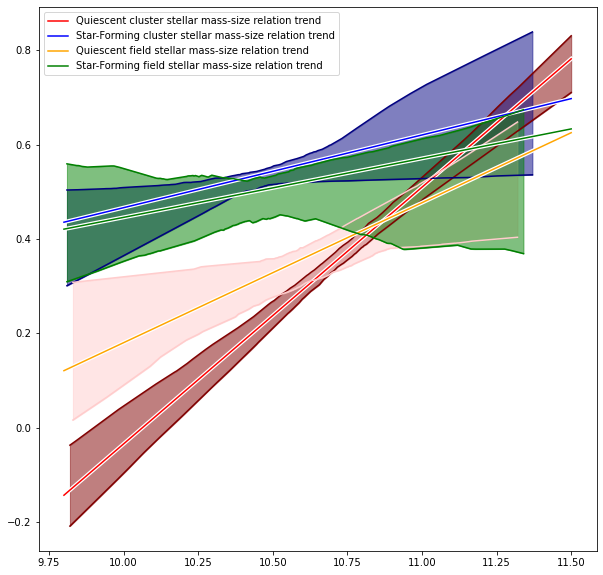

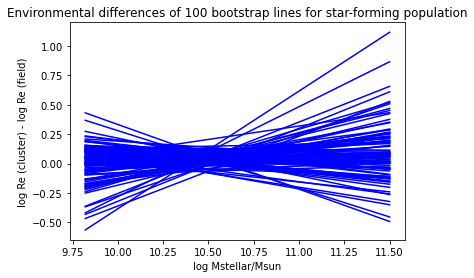

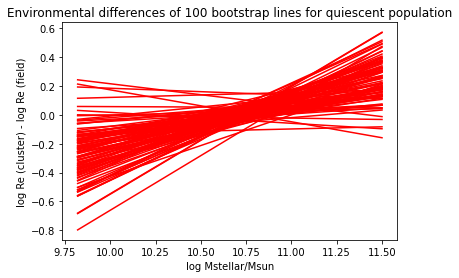

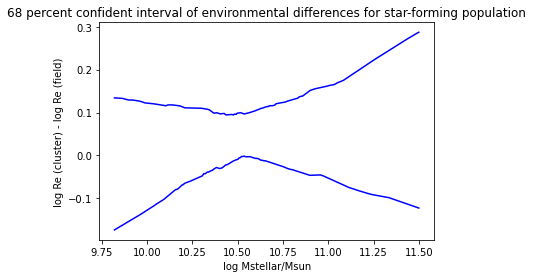

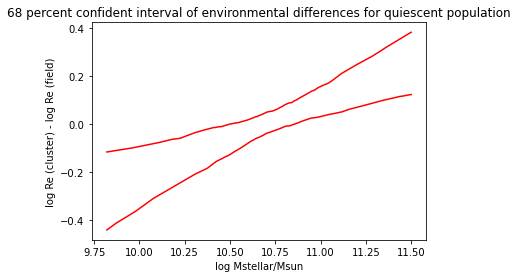

In [3]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    ratio = gg.compTrends(x=10.5)
    print(ratio) # first value is quiescent ratio, second is sf

Plot stellar mass-size relation trends with uncertainties for cluster vs field in quiescent and star-forming populations, calculate ratio of these trends at log M*/Msun = 10.5, and analyze uncertainties (bottom four plots are differences in bootstrap lines and confidence region of differences, respectively, as a function of mass).

In [4]:
# Establish criteria ( run before calling plot() )

searchCriteria = [
            'Star == 0',
            'K_flag == 0',
            'Mstellar > 10**9.8',
            '(1 < zspec < 1.5) or ((((Redshift_Quality != 3) and (Redshift_Quality != 4)) or (SPECID < 0)) and (1 < zphot < 1.5))',
            'cluster_id <= 12',
            'totmask == 0',
            'Fit_flag > 2',
            'n < 6',
            'HSTFOV_flag == 1',
            're > 0'
]
gg.standardCriteria = searchCriteria

We change our standard search criteria to use 'K_flag == 0' instead.

Quiescent cluster count: 161
Star-Forming cluster count: 89
Quiescent field count: 50
Star-Forming field count: 88
(0.7509620152735107, 1.178542840635526)


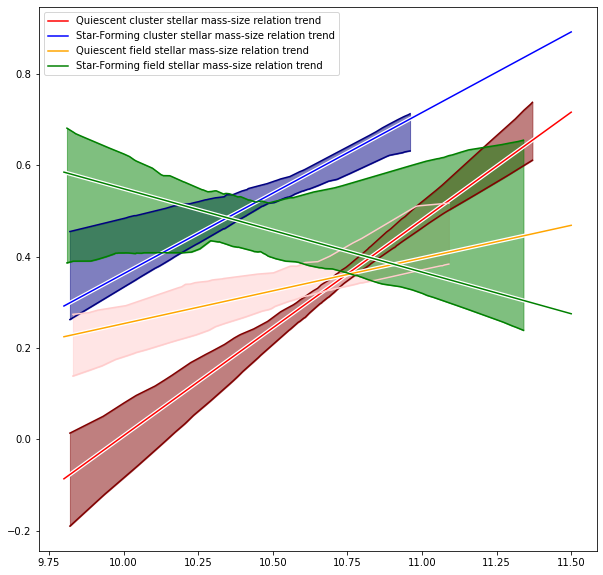

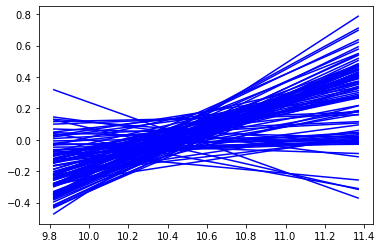

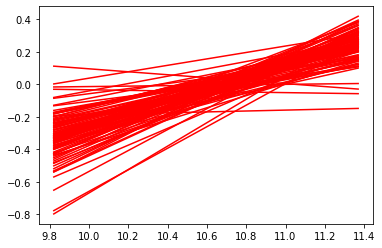

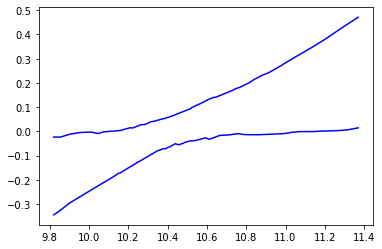

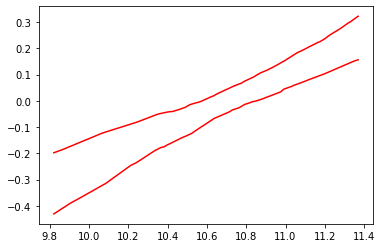

In [5]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    ratio = gg.compTrends(x=10.5)
    print(ratio) # first value is quiescent ratio, second is sf

Plot stellar mass-size relation trends with uncertainties for cluster vs field in quiescent and star-forming populations, calculate ratio of these trends at log M*/Msun = 10.5, and analyze uncertainties (bottom four plots are differences in bootstrap lines and confidence region of differences, respectively, as a function of mass).

We see that the use of 'K_flag == 0' instead of 'K_flag < 4' results in more accurate results for the cluster population but less reasonable results for the field population without a significant increase in accuracy.